In [12]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")
import pandas as pd
df_stars = pd.read_csv("stars.csv")

print(df_stars.columns)

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_
print(class_names)


['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']


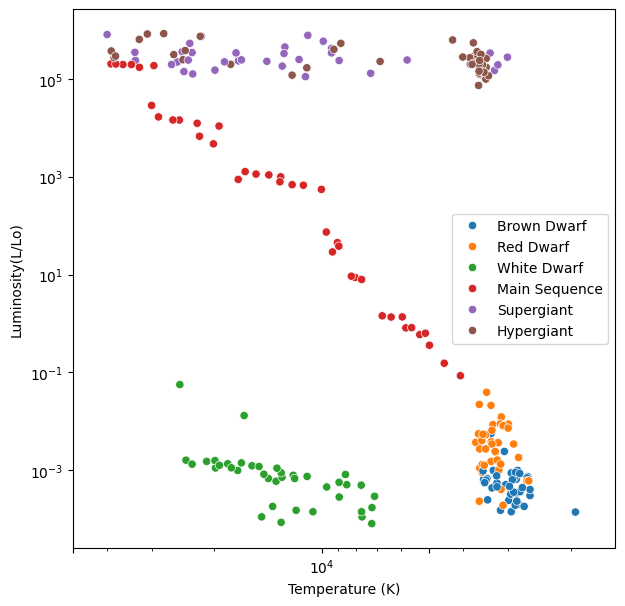

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()


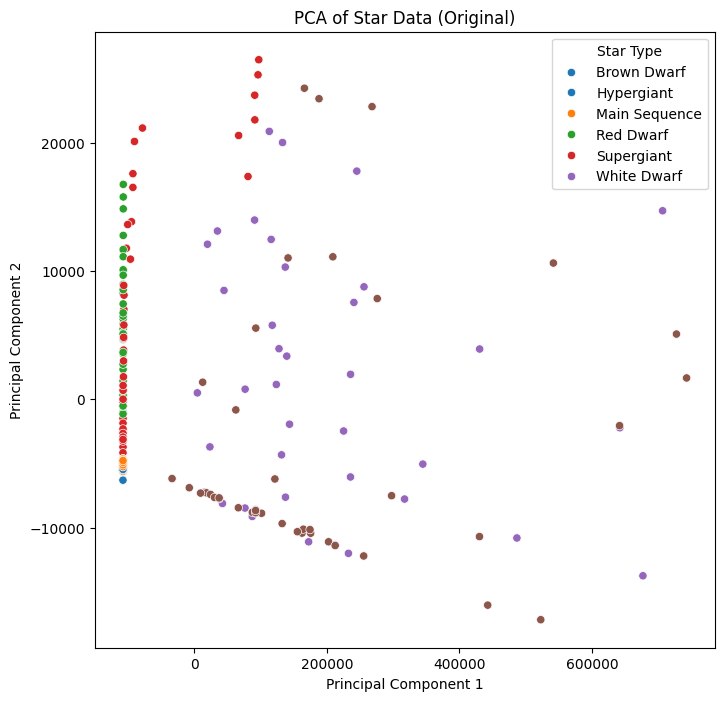

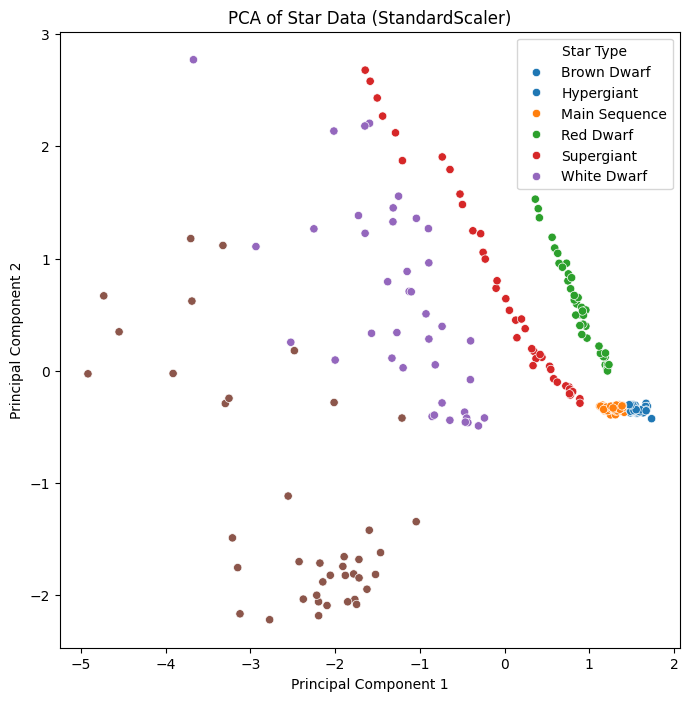

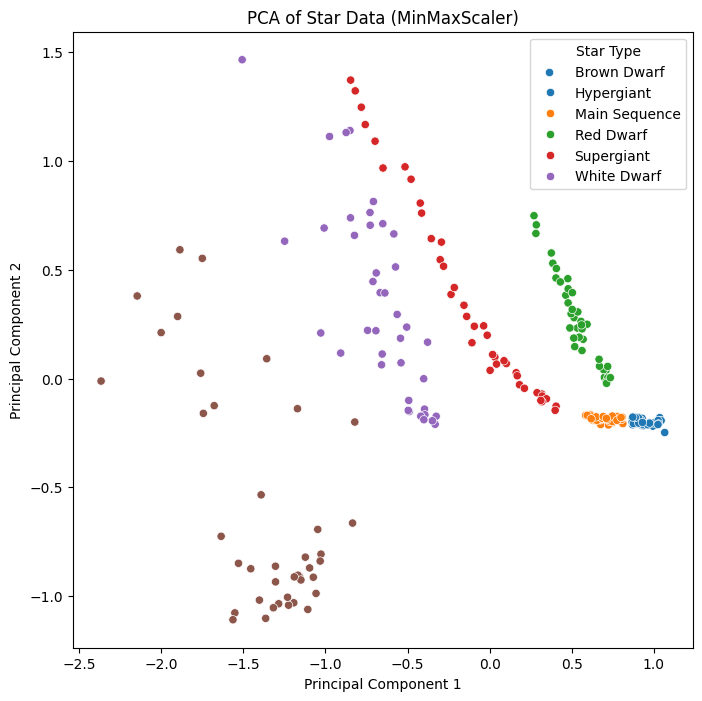

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Seleziona le colonne numeriche
numeric_columns = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
X = df_stars[numeric_columns]


# Normalizza i dati - media = 1 e varianza = 0
scaler = StandardScaler()
X_stdscaler = scaler.fit_transform(X)

# Normalizza i dati - ciascuna colonna compresa tra -1 e 1
scaler = MinMaxScaler(feature_range=(-1, 1))
X_minmaxscaler = scaler.fit_transform(X)

# Lista dei dataset da analizzare
datasets = {'Original': X, 'StandardScaler': X_stdscaler, 'MinMaxScaler': X_minmaxscaler}

# Ciclo per applicare la PCA e plottare i risultati
for name, data in datasets.items():
    # Applica la PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data)
    
    # Crea un DataFrame per le componenti principali
    df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
    
    # Plot dei risultati
    plt.figure(figsize=(8, 8))
    sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue=labels, palette='tab10')
    plt.title(f'PCA of Star Data ({name})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Star Type', loc='best', labels=class_names)
    plt.show()